In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2024-04-04 / Aki Taanila


<h1>Ensimmäinen esimerkki luokittelusta</h1>

Tästä muistiosta opit luokittelumallien opettamiseen liittyviä perustekniikoita, jotka toistuvat samankaltaisina aina luokittelumalleja opetettaessa:

* Selittävien muuttujien arvojen (**X**) ja kohdemuuttujan arvojen (**y**) määrittely.
* **Testidata**n erottaminen opetusdatasta.
* Mallin opettaminen/sovittaminen **fit**-funtiolla.
* Mallin **tarkkuus** opetusdatalle ja testidatalle.
* Mallin antamien ennusteiden tarkastelu **sekaannusmatriisi**na opetusdatalle ja testidatalle.
* Mallin **ennusteet** täysin uudelle datalle.

Kurjenmiekkojen (iris) luokittelu on klassinen esimerkki, joka usein otetaan ensimmäisenä esimerkkinä luokittelumalleista.

Tässä opetan mallin erottelemaan kurjenmiekan lajikkeita (setosa, versicolor ja virginica) toisistaan verholehtien (sepal) ja terälehtien (petal) pituuksien ja leveyksien perusteella.

Tässä käytän mallina **päätöspuuta** (decision tree), jonka rakenteen voin esittää havainnollisena kaaviona. Parempiakin malleja löytyy, mutta käytän tarkoituksella tässä ensimmäisessä esimerkissä mallia, jota voin havainnollistaa kaaviona.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train_test_split osaa jakaa datan opetusdataan ja testidataan
from sklearn.model_selection import train_test_split

# Käytän luokittelumallina päätöspuuta (DecisionTreeClassifier), plot_tree osaa piirtää päätöspuun
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Sekaannusmatriisin näyttämiseen
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Datan tarkastelua

In [3]:
# Lataan datan seaborn-kirjastosta
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

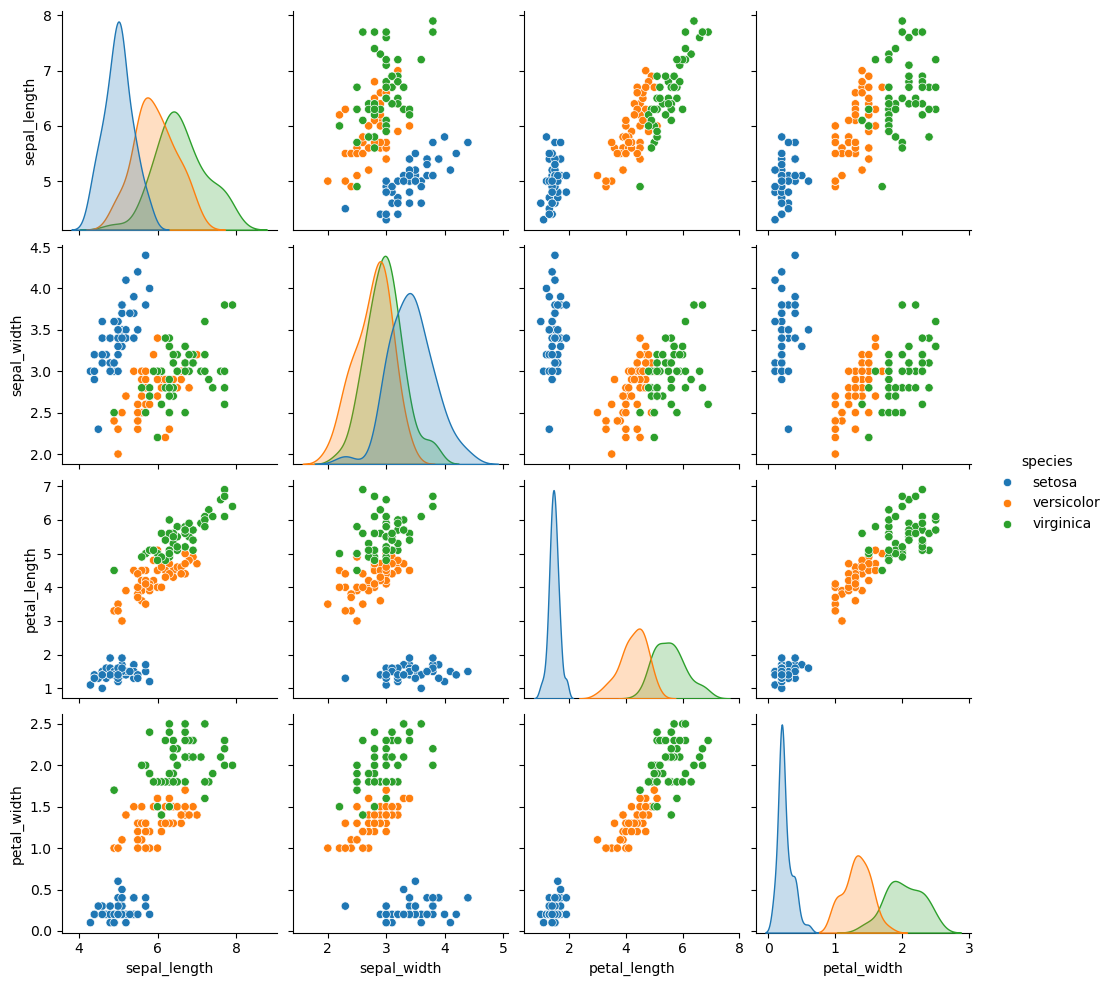

In [5]:
# Parittaiset hajontakaaviot, joissa eri lajikkeet (species) eri väreillä
sns.pairplot(df, hue='species')

Hajontakaavioiden perusteella setosat ovat helposti eroteltavissa, mutta versicolor ja virginica menevät jossain määrin päällekkäin. Erityisesti terälehden pituus ja leveys (petal_length ja petal_width) näyttäisivät erottelevan lajikkeita hyvin.

## Mallin sovitus

Mallin opettamiseen tarvitaan selittävien muuttujien arvot ja kohdemuuttujan (ennustettava muuttuja) arvot. Tässä verholehtien ja terälehtien mitat ovat selittäviä muuttujia ja kurjenmiekan lajike on kohdemuuttuja.

On tärkeää erottaa osa opetusdatasta testidataksi. Opetusdataa käyttäen malli opetetaan ja testidataa käyttäen varmistetaan mallin toimivuus datalla, jota ei käytetty opettamiseen.

Jako opetus- ja testidataan tapahtuu sattumanvaraisesti, joten eri suorituskerroilla saan erilaisia jakoja. Koska eri suorituskerroilla on erilaisia opetusdatoja, niin mallikin voi hieman vaihdella suorituskerroittain. Tässä annan **random_state**-parametrille kiinteän arvon, jonka seurauksena jako tehdään jokaisella suorituskerralla samalla tavalla.

In [6]:
# Selittävät muuttujat
X = df.drop('species', axis=1)

# Kohdemuuttuja
y = df['species']

# Datan jako opetus- ja testidataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

Päätöspuu kuten muutkin sklearn-kirjaston mallit opetetaan **fit**-funktiolla, jolle annetaan parametreina opetusdatan selittävien muuttujien arvot ja kohdemuuttujan arvot.

Opetettavalle mallille voidaan määrittää niin kutsuttuja hyperparametreja. Tässä määritän päätöspuun maksimi syvyyden eli haarautumisten määrän (**max_depth**). Voit kokeilla muitakin arvoja. Mallin opettamiseen liittyy sattumanvaraisuutta, joten eri suorituskerroilla voidaan saada toisistaan poikkeavia päätöspuita. Kiinteä arvo **random_state**-parametrille takaa että eri suorituskerroilla saadaan samanlainen päätöspuu.

In [7]:
# Mallin sovitus (opettaminen)
malli = DecisionTreeClassifier(max_depth=3, random_state=2)
malli.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

## Mallin arviointia

Mallin tarkkuus opetusdatassa kasvaa haarautumisten lisääntyessä, mutta samalla kasvaa ylisovituksen riski. Jos mallin tarkkuus opetusdatassa on selvästi suurempi kuin testidatassa, niin tämä kertoo ylisovituksesta.

Tässä opetusdatan ja testidatan tarkkuudet ovat lähellä toisiaan, joten päätöspuun syvyys 3 oli hyvä valinta.

In [8]:
print(f'Mallin tarkkuus opetusdatassa {malli.score(X_train, y_train):.3f}')
print(f'Mallin tarkkuus testidatassa {malli.score(X_test, y_test):.3f}')

Mallin tarkkuus opetusdatassa 0.982
Mallin tarkkuus testidatassa 0.974


Edellä käytetään tarkkuuden esittämiseen muotoiltua merkkijonoa. Muotoiltua merkkijonoa edeltää **f**. Muotoiltuun merkkijonoon voin lisätä muuttujan arvon aaltosulkujen sisään ja voin samalla antaa muotoiluohjeen. Tässä muotoiluohje **:.3f** muotoilee desimaaliluvun kolmen desimaalin tarkkuuteen.

Mallin antamia ennusteita päästään tarkastelemaan **sekaannusmatriisin** (confusion matrix) avulla.

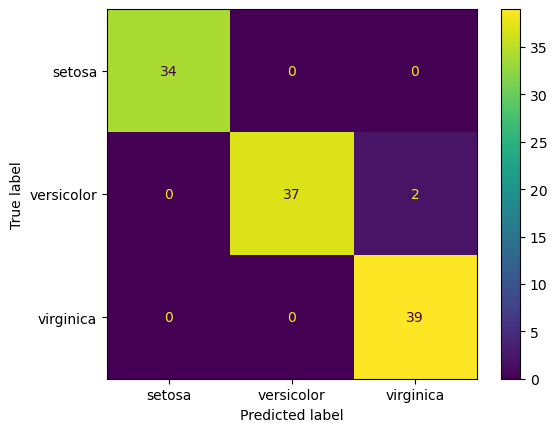

In [9]:
# Sekaannus-matriisi opetusdatalle

# Mallin antamat ennusteet opetusdatalle
y_train_malli = malli.predict(X_train)

cm = confusion_matrix(y_train, y_train_malli)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa', 'versicolor', 'virginica']).plot()

* jokainen opetusdatan 34 setosasta ennustetaan oikein setosaksi.
* opetusdatan 39 versicolorista 37 ennustetaan oikein versicoloriksi ja 2 ennustetaan virheellisesti virginicaksi.
* jokainen opetusdatan 39 virginista ennustetaan oikein virginaksi.

Opetusdatan sekaannusmatriisi ei sellaisenaan kerro, toimiiko malli myös opetusdatan ulkopuolella (ylisovittamisen takia opetusdatasssa hyvin toimiva malli ei välttämättä toimi opetusdatan ulkopuolella).
Testidatan sekaannusmatriisista nähdään toimiiko opetettu malli myös opetukseen käytetyn datan ulkopuolella.

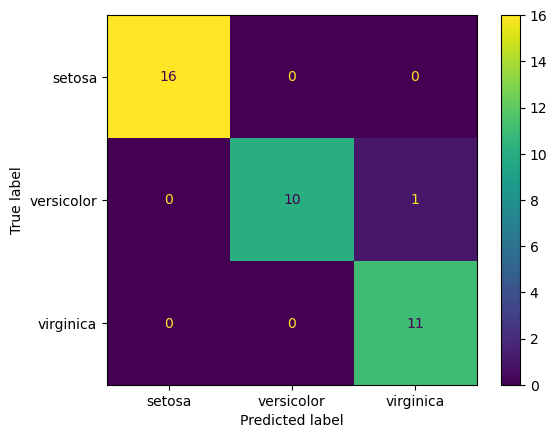

In [10]:
# Sekaannus-matriisi testidatalle

# Mallin antamat ennusteet testidatalle
y_test_malli = malli.predict(X_test)

cm = confusion_matrix(y_test, y_test_malli)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['setosa', 'versicolor', 'virginica']).plot()

Testidatassa malli ennustaa yhden versicolorin virheellisesti virginicaksi.

[Text(0.375, 0.875, 'petal_width <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [34, 39, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.625, 'petal_width <= 1.65\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(0.25, 0.375, 'petal_length <= 4.95\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'petal_length <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

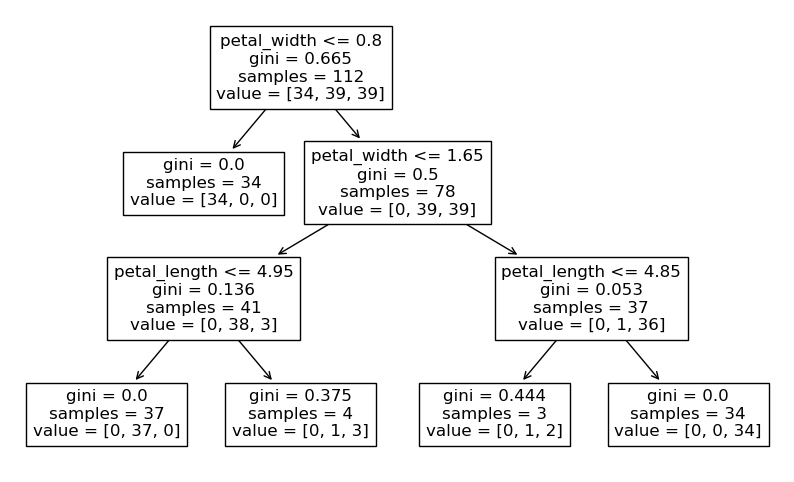

In [11]:
# Päätöspuumallin opetusdatassa voin havainnollistaa kaaviona
plt.figure(figsize=(10, 6))
plot_tree(decision_tree=malli, 
          feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

#### Selitystä

Opetusdatassa on 34 setosaa, 39 versicoloria ja 39 virginicaa.

Ensimmäisessä haarautumisessa päätössääntönä on **petal_width <= 0.8**, jonka perusteella saadaan eroteltua kaikki setosa-lajikkeeseen kuuluvat omaan haaraansa.

Ensimmäisessä vaiheessa **gini** = (34/112)^2 + (39/112)^2 + (39/112)^2 (todennäköisyyksien neliöiden summa). Ginin arvosta voidaan johtaa **gini impurity**:

**gini impurity** = 1 - gini = 0.665. 

Harhaanjohtavasti kaaviossa käytetään nimitystä **gini** vaikka kyseessä on **gini impurity**. Päätöspuu-algoritmi määrittää haarautumiskohdat siten että päästään mahdollisimman pieniin gini impurity -arvoihin. 

Jos en käytä mallin sovituksessa kiinteää **random_state**-parametrin arvoa, niin eri suorituskerroilla päätöspuussa voi olla toisistaan poikkeavia päätössääntöjä.

## Mallin käyttö ennustamiseen

In [12]:
# Avaan uuden datan, jossa lajikkeet (species) eivät ole tiedossa
# Datassa täytyy olla samat selittävät muuttujat kuin mallia sovitettaessa
Xnew = pd.read_excel('https://taanila.fi/irisnew.xlsx')
Xnew

sepal_length  sepal_width  petal_length  petal_width
0           5.0          3.5           1.5          0.3
1           8.1          3.3           6.5          1.9
2           6.0          3.0           3.0          0.5

Ennusteet voin laskea **predict**-funktiolla.

Todennäköisyydet voin laskea **predict_proba**-funktiolla. Funktio palautta todennäköisyyden jokaiselle kategorialla (tässä kolmelle lajikkeelle).

In [13]:
# Lasken ennusteet
ennuste = malli.predict(Xnew)

# Lasken todennäköisyydet
todnak = malli.predict_proba(Xnew).round(2)

# Lisään ennusteet ja todennäköisyydet dataan
Xnew['ennuste'] = ennuste
Xnew[['tn_setosa', 'tn_versicolor', 'tn_virginica']] = todnak
Xnew

sepal_length  sepal_width  petal_length  petal_width    ennuste  tn_setosa  \
0           5.0          3.5           1.5          0.3     setosa        1.0   
1           8.1          3.3           6.5          1.9  virginica        0.0   
2           6.0          3.0           3.0          0.5     setosa        1.0   

   tn_versicolor  tn_virginica  
0            0.0           0.0  
1            0.0           1.0  
2            0.0           0.0

Ensimmäisen ja viimeinen ennustetaan setosaksi, toinen virginicaksi. Tässä ennusteet olivat lähes varmoja (todennäköisyys 1 eli 100 %).

## Lisätietoa

Päätöspuu sklearn-kirjaston käyttöoppaassa: https://scikit-learn.org/stable/modules/tree.html#tree

Päätöspuun dokumentaatio sklearn-kirjastossa: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/